### Bài tập quá trình 2: Lập trình hướng đối tượng trong Python
#### Bài tập 1. QUẢN LÝ NHÂN VIÊN

### Sơ đồ lớp

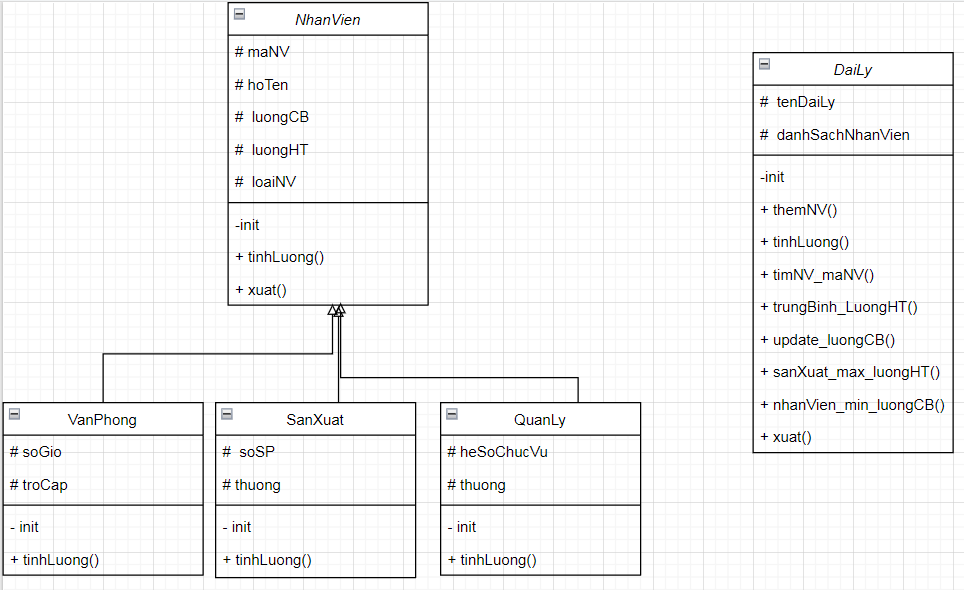

### tạo các class

In [153]:
import math
### tạo class NhanVien
class NhanVien:
  def __init__(self, maNV, hoTen, luongCB):
    self._maNV = maNV
    self._hoTen = hoTen
    self._luongCB = luongCB
    self._luongHT = 0
    self._loaiNV = None
  def xuat(self):
    print(f"Mã NV: {self._maNV} || Họ và tên: {self._hoTen} || Lương cơ bản: {self._luongCB:,} || Lương hàng tháng: {self._luongHT:,}")
  def tinhLuong(self):
    pass

  @property
  def luongCB(self):
      return self._luongCB
  @luongCB.setter
  def luongCB(self, luong):
      self._luongCB = luong
  @property
  def loaiNV(self):
      return self._loaiNV

### tạo class Nhân viên Văn Phòng, kế thửa từ Nhân Viên
class VanPhong(NhanVien):
  def __init__(self, maNV, hoTen, luongCB, soGio):
    super().__init__(maNV, hoTen, luongCB)
    self._loaiNV = "VP"
    self._soGio = soGio
  def tinhLuong(self):
    if self._soGio > 100:
      self._luongHT = self._luongCB + self._soGio*220_000 + 5_000_000
    else:
      self._luongHT = self._luongCB + self._soGio*220_000


### tạo class Nhân viên Sản xuất, kế thửa từ Nhân Viên
class SanXuat(NhanVien):
  def __init__(self, maNV, hoTen, luongCB, soSP):
    super().__init__(maNV, hoTen, luongCB)
    self._loaiNV = "SX"
    self._soSP = soSP
  def tinhLuong(self):
    if self._soSP > 150:
      self._luongHT = int( (self._luongCB + self._soSP * 175_000) * 1.2)
    else:
      self._luongHT = int(self._luongCB + self._soSP * 175_000)


### tạo class  Quản lý, kế thửa từ Nhân Viên
class QuanLy(NhanVien):
  def __init__(self, maNV, hoTen, luongCB, heSoChucVu, thuong):
    super().__init__(maNV, hoTen, luongCB)
    self._loaiNV = "QL"
    self._heSoChucVu = heSoChucVu
    self._thuong = thuong
  def tinhLuong(self):
    self._luongHT = int(self._luongCB * self._heSoChucVu +self._thuong)


In [168]:
class DaiLy:
  def __init__(self):
    self._danhSachNV = []
  def themNV(self, nv):
    self._danhSachNV.append(nv)
  def tinhLuong(self):
    for nv in self._danhSachNV:
      nv.tinhLuong()

  def timNV_maNV(self, maNV):
    """Hàm tìm nhân viên theo mã nhân viên. input: maNV"""
    for nv in self._danhSachNV:
      if nv._maNV == maNV:
        print(f"Thông tin nhân viên có mã {maNV}:")
        nv.xuat()
        return
    print(f"Không tìm thấy nhân viên có mã {maNV}")
  def trungBinh_luongHT(self):
    """Hàm tính lương trung bình của Đại lý"""
    tongLuong = 0
    for nv in self._danhSachNV:
      tongLuong += nv._luongHT
    return tongLuong / len(self._danhSachNV)
  def update_luongCB(self, maNV, luong):
      """Hàm tính giúp cập nhật lương cơ bản theo mã nhân viên. input: maNV, luong """
      for nv in self._danhSachNV:
          if nv._maNV == maNV:
              nv.luongCB = luong
              return
          else:
              print('Không tìm thấy nhân viên')

  def sanXuat_max_luongHT(self):
      """Hàm tìm danh sách nhân viên sản xuất có lương hàng tháng cao nhất"""
      result = []
      luongHT_max = 0
      for nv in self._danhSachNV:
        if (nv._luongHT > luongHT_max) and (nv.loaiNV =='SX') :
            luongHT_max= nv._luongHT
      for nv in self._danhSachNV:
          if nv._luongHT == luongHT_max:
              result.append(nv)
      if result:
        for i in result:
            i.xuat()
      else:
          print('Không có nhân viên sản xuất trong Đại lý')

  def nhanVien_min_luongCB(self):
      """Hàm tìm danh sách nhân viên có lương cơ bản thấp nhất"""
      result = []
      luongCB_min = math.inf
      for nv in self._danhSachNV:
        if (nv._luongCB < luongCB_min):
           luongCB_min= nv._luongCB
      for nv in self._danhSachNV:
          if nv._luongCB == luongCB_min:
              result.append(nv)
      if result:
        print('Danh sách nhân viên có lương cơ bản thấp nhất')
        for i in result:
            i.xuat()

  def xuatDS(self):
    for nv in self._danhSachNV:
      nv.xuat()

### Phần trả lời các yêu cầu

In [169]:
# Câu 1:  Khởi tạo dữ liệu cho Đại lý
DaiLy_A = DaiLy()
# Nhập danh sách nhân viên văn phòng:
DaiLy_A.themNV(VanPhong('101','Nguyễn A', 4_500_000, 200))
DaiLy_A.themNV(VanPhong('102','Nguyễn B', 5_600_000, 100))
DaiLy_A.themNV(VanPhong('103','Nguyễn C', 8_900_000, 90))
# Nhập danh sách nhân viên sản xuất:
DaiLy_A.themNV(SanXuat('201','Nguyễn D', 7_800_000, 250))
DaiLy_A.themNV(SanXuat('202','Nguyễn E', 4_500_000, 110))
DaiLy_A.themNV(SanXuat('203','Nguyễn F', 6_600_000, 360))
# Nhập danh sách nhân viên quản lý:
DaiLy_A.themNV(QuanLy('301', 'Nguyễn G', 8_500_000, 1.3, 19_500_000))
DaiLy_A.themNV(QuanLy('302', 'Nguyễn H', 7_600_000, 1.2, 18_600_000))

In [170]:
# Câu 2:  Xuất thông tin của các nhân viên.
DaiLy_A.xuatDS()

Mã NV: 101 || Họ và tên: Nguyễn A || Lương cơ bản: 4,500,000 || Lương hàng tháng: 0
Mã NV: 102 || Họ và tên: Nguyễn B || Lương cơ bản: 5,600,000 || Lương hàng tháng: 0
Mã NV: 103 || Họ và tên: Nguyễn C || Lương cơ bản: 8,900,000 || Lương hàng tháng: 0
Mã NV: 201 || Họ và tên: Nguyễn D || Lương cơ bản: 7,800,000 || Lương hàng tháng: 0
Mã NV: 202 || Họ và tên: Nguyễn E || Lương cơ bản: 4,500,000 || Lương hàng tháng: 0
Mã NV: 203 || Họ và tên: Nguyễn F || Lương cơ bản: 6,600,000 || Lương hàng tháng: 0
Mã NV: 301 || Họ và tên: Nguyễn G || Lương cơ bản: 8,500,000 || Lương hàng tháng: 0
Mã NV: 302 || Họ và tên: Nguyễn H || Lương cơ bản: 7,600,000 || Lương hàng tháng: 0


In [171]:
# Câu 3:  Thực hiện việc tính lương cho từng nhân viên.
DaiLy_A.tinhLuong()
DaiLy_A.xuatDS()

Mã NV: 101 || Họ và tên: Nguyễn A || Lương cơ bản: 4,500,000 || Lương hàng tháng: 53,500,000
Mã NV: 102 || Họ và tên: Nguyễn B || Lương cơ bản: 5,600,000 || Lương hàng tháng: 27,600,000
Mã NV: 103 || Họ và tên: Nguyễn C || Lương cơ bản: 8,900,000 || Lương hàng tháng: 28,700,000
Mã NV: 201 || Họ và tên: Nguyễn D || Lương cơ bản: 7,800,000 || Lương hàng tháng: 61,860,000
Mã NV: 202 || Họ và tên: Nguyễn E || Lương cơ bản: 4,500,000 || Lương hàng tháng: 23,750,000
Mã NV: 203 || Họ và tên: Nguyễn F || Lương cơ bản: 6,600,000 || Lương hàng tháng: 83,520,000
Mã NV: 301 || Họ và tên: Nguyễn G || Lương cơ bản: 8,500,000 || Lương hàng tháng: 30,550,000
Mã NV: 302 || Họ và tên: Nguyễn H || Lương cơ bản: 7,600,000 || Lương hàng tháng: 27,720,000


In [172]:
# Câu 4: Tìm kiếm nhân viên theo mã nhân viên
DaiLy_A.timNV_maNV('101')
DaiLy_A.timNV_maNV('103')
DaiLy_A.timNV_maNV('302')
DaiLy_A.timNV_maNV('303')

Thông tin nhân viên có mã 101:
Mã NV: 101 || Họ và tên: Nguyễn A || Lương cơ bản: 4,500,000 || Lương hàng tháng: 53,500,000
Thông tin nhân viên có mã 103:
Mã NV: 103 || Họ và tên: Nguyễn C || Lương cơ bản: 8,900,000 || Lương hàng tháng: 28,700,000
Thông tin nhân viên có mã 302:
Mã NV: 302 || Họ và tên: Nguyễn H || Lương cơ bản: 7,600,000 || Lương hàng tháng: 27,720,000
Không tìm thấy nhân viên có mã 303


In [159]:
# Câu 5: Tính trung bình tiền lương hằng tháng mà đại lý trả cho NV.
print(f'Tiền lương trung bình hàng tháng phải trả cho mỗi nhân viên: {DaiLy_A.trungBinh_luongHT():,}')


Tiền lương trung bình hàng tháng phải trả cho mỗi nhân viên: 42,150,000.0


In [160]:
# Câu 6: Cập nhật lương cơ bản của nhân viên theo mã nhân viên.
print('Thông tin nhân viên 101 trước khi thay đổi lương cơ bản')
DaiLy_A.timNV_maNV('101')
# Thực hiện thay đởi lương cơ bản:
DaiLy_A.update_luongCB('101',5_000_000)
print('Thông tin nhân viên 101 sau khi thay đổi lương cơ bản')
DaiLy_A.timNV_maNV('101')


Thông tin nhân viên 101 trước khi thay đổi lương cơ bản
Thông tin nhân viên có mã 101:
Mã NV: 101 || Họ và tên: Nguyễn A || Lương cơ bản: 4,500,000 || Lương hàng tháng: 53,500,000
Thông tin nhân viên 101 sau khi thay đổi lương cơ bản
Thông tin nhân viên có mã 101:
Mã NV: 101 || Họ và tên: Nguyễn A || Lương cơ bản: 5,000,000 || Lương hàng tháng: 53,500,000


In [165]:
# Câu 7: Tìm nhân viên sản xuất có lương cao nhất
DaiLy_A.sanXuat_max_luongHT()

Mã NV: 203 || Họ và tên: Nguyễn F || Lương cơ bản: 6,600,000 || Lương hàng tháng: 83,520,000


In [162]:
# Câu 8: Tìm các nhân viên có lương cơ bản thấp nhất.
DaiLy_A.nhanVien_min_luongCB()



Danh sách nhân viên có lương cơ bản thấp nhất
Mã NV: 101 || Họ và tên: Nguyễn A || Lương cơ bản: 4,500,000 || Lương hàng tháng: 0
Mã NV: 202 || Họ và tên: Nguyễn E || Lương cơ bản: 4,500,000 || Lương hàng tháng: 0
